# Preparations

## Download the dataset

In [ ]:
!pwd
%cd /content/

/content
/content


In [ ]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="8y4Hn3PVSbHSiXotYsVW")
#project = rf.workspace("effdetvini").project("vini-underwater-detection")
#dataset = project.version(5).download("tfrecord")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8y4Hn3PVSbHSiXotYsVW")
project = rf.workspace("effdetvini").project("vini-underwater-detection")
dataset = project.version(5).download("tfrecord")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 491.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 13.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=bf6c8fc10dcda46d7c5aa33da22d7d959bf37a9b9f7b1c3750d23b3c7e77768e
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninsta

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to vini-underwater-detection-5 in tfrecord:: 100%|██████████| 11/11 [00:00<00:00, 11.30it/s]


## Download the code

In [ ]:
import os
import sys
if not os.path.isdir("automl"):
    # clone the repository
    !git clone --depth 1 https://github.com/google/automl

    # checkout to the latest commit that we used when we're creating this notebook
    %cd automl
    !git checkout 1ec78d22aa9f8b7d33b9cf3a177e05dcc6b4a093

    # change the working directory
    %cd efficientdet

    # install required packages
    # if it fails to install pycocotools, please manually remove pycocotools from requirements.txt and run again
    %pip install -r requirements.txt
    %pip install -U "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

PROJ_DIR = os.path.join("..", "..")

Cloning into 'automl'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 176 (delta 16), reused 68 (delta 0), pack-reused 0
Receiving objects: 100% (176/176), 13.76 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/automl
fatal: reference is not a tree: 1ec78d22aa9f8b7d33b9cf3a177e05dcc6b4a093
/content/automl/efficientdet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-1ony3vtx
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-1ony3vtx
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━

## Download the pretrained model

In [ ]:
%cd /content/automl/efficientdet/
MODEL = "efficientdet-d1"
if not os.path.exists(f"{MODEL}.tar.gz"):
    !curl -O https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco2/{MODEL}.tar.gz
    !tar xvzf {MODEL}.tar.gz

/content/automl/efficientdet
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.5M  100 46.5M    0     0  11.1M      0  0:00:04  0:00:04 --:--:-- 11.7M
efficientdet-d1/
efficientdet-d1/model.meta
efficientdet-d1/model.index
efficientdet-d1/checkpoint
efficientdet-d1/d1_coco_val.txt
efficientdet-d1/d1_coco_test-dev2017.txt
efficientdet-d1/model.data-00000-of-00001


# Preprocess the dataset

## Preprocessing parameters

In [ ]:
PROJ_DIR

'../..'

In [ ]:
test_record_fname = dataset.location + '/test/underwater-animals.tfrecord'
train_record_fname = dataset.location + '/train/underwater-animals.tfrecord'
label_map_pbtxt_fname = dataset.location + '/train/underwater-animals_label_map.pbtxt'
DATASET_DIR = os.path.join(PROJ_DIR, "/content/vini-underwater-detection-5")
TFRECORD_DIR = os.path.join(PROJ_DIR, "tfrecords")

#TRAIN_SET_FILE = os.path.join(DATASET_DIR, "splits", "train.txt")
#VAL_SET_FILE = os.path.join(DATASET_DIR, "splits", "val.txt")
#TEST_SET_FILE = os.path.join(DATASET_DIR, "splits", "test.txt")

SAMPLES_PER_FILE = 10000   # we only construct a subset, in total there are 100,000 samples in each set

LP_CLASS = 1   # class id for the license plate

# Model training

## Create the config YAML file

In [ ]:
CONFIG_DIR = os.path.join(PROJ_DIR, "configs")
CONFIG_FILE = os.path.join(CONFIG_DIR, "default.yaml")
if not os.path.exists(CONFIG_DIR):
    os.mkdir(CONFIG_DIR)

config_text = \
"""image_size: 540X960
num_classes: 6
label_map: {1: crab, 2: fish, 3: jellyfish, 4: shrimp, 5: small_fish, 6: starfish}
input_rand_hflip: true
jitter_min: 0.8
jitter_max: 1.2
"""

with open(CONFIG_FILE, "w") as fwrite:
    fwrite.write(config_text)

## Training parameters

In [ ]:
CKPT = MODEL
#test_record_fname = dataset.location + '/test/underwater-animals.tfrecord'
#train_record_fname = dataset.location + '/train/underwater-animals.tfrecord'
label_map_pbtxt_fname = '/content/vini-underwater-detection-5/train/underwater-animals_label_map.pbtxt'
TRAIN_SET = '/content/vini-underwater-detection-5/train/underwater-animals.tfrecord'
VAL_SET = '/content/vini-underwater-detection-5/valid/underwater-animals.tfrecord'
MODEL_DIR_TMP = os.path.join(PROJ_DIR, "tmp", f"{MODEL}-finetune")
TRAIN_NUM_EXAMPLES = 500
EVAL_NUM_EXAMPLES = 50
EPOCHS = 100
BATCH_SIZE = 2

## Remove the previous checkpoint (if exists) before restarting the training

In [ ]:
!pwd

/content/automl/efficientdet


In [ ]:
if os.path.exists(MODEL_DIR_TMP):
    !rm -rf {MODEL_DIR_TMP}

## Start training

In [ ]:
!python -m main --help


2023-03-22 13:51:04.193132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 13:51:05.163490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 13:51:05.163611: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!pwd

/content/automl/efficientdet



# **Heree!!!**


In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir={MODEL_DIR_TMP} \
    --ckpt=/content/tmp/efficientdet-d1-finetune/model.ckpt-9500 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 17:08:48.954780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 17:08:50.175481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 17:08:50.176982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir={MODEL_DIR_TMP} \
    --ckpt=/content/tmp/efficientdet-d1-finetune/model.ckpt-10750 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 19:57:41.168178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 19:57:42.108965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 19:57:42.109087: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir={MODEL_DIR_TMP} \
    --ckpt=/content/tmp/efficientdet-d1-finetune/model.ckpt-12000 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 18:07:45.038946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 18:07:46.424717: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 18:07:46.424856: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-13250 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 19:58:19.825794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 19:58:20.718363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 19:58:20.718462: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-14500 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 20:25:36.215200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 20:25:38.040277: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 20:25:38.041157: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-15750 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 20:52:13.578616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 20:52:14.698367: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 20:52:14.698492: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-17000 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 21:18:49.013619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 21:18:50.448852: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 21:18:50.448997: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-18250 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-22 21:46:11.631355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 21:46:12.621247: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 21:46:12.621373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-19500 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-23 19:10:30.749956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 19:10:31.612326: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-23 19:10:31.612429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-20750 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-23 19:35:09.073608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 19:35:10.521182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-23 19:35:10.521300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-22000 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-23 20:02:59.716746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 20:03:01.122588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-23 20:03:01.122717: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-23250 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-23 20:27:32.451351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 20:27:33.429913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-23 20:27:33.430043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
!python -m main \
    --mode=train_and_eval \
    --train_file_pattern={TRAIN_SET} \
    --val_file_pattern={VAL_SET} \
    --model_name={MODEL} \
    --model_dir=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune \
    --ckpt=/content/drive/MyDrive/tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-24500 \
    --train_batch_size={BATCH_SIZE} \
    --eval_batch_size={BATCH_SIZE} \
    --num_epochs={EPOCHS} \
    --num_examples_per_epoch={TRAIN_NUM_EXAMPLES} \
    --eval_samples={EVAL_NUM_EXAMPLES} \
    --hparams={CONFIG_FILE}

2023-03-23 20:51:39.526772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 20:51:40.436466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-23 20:51:40.436585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

In [ ]:
%cd automl/efficientdet/

/content/automl/efficientdet


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
%cd gdrive/MyDrive/
%cp -av /content/tmp/ tmp_22Mar23_1435

[Errno 2] No such file or directory: 'gdrive/MyDrive/'
/content/automl/efficientdet/gdrive/MyDrive
'/content/tmp/' -> 'tmp_22Mar23_1435'
'/content/tmp/efficientdet-d1-finetune' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune'
'/content/tmp/efficientdet-d1-finetune/config.yaml' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/config.yaml'
'/content/tmp/efficientdet-d1-finetune/events.out.tfevents.1679493118.cd7aa2e45001' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/events.out.tfevents.1679493118.cd7aa2e45001'
'/content/tmp/efficientdet-d1-finetune/model.ckpt-12750.meta' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-12750.meta'
'/content/tmp/efficientdet-d1-finetune/model.ckpt-12500.meta' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-12500.meta'
'/content/tmp/efficientdet-d1-finetune/model.ckpt-13250.meta' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/model.ckpt-13250.meta'
'/content/tmp/efficientdet-d1-finetune/backup' -> 'tmp_22Mar23_1435/efficientdet-d1-finetune/back

# Model inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Export the model (from checkpoint to saved model format)

In [ ]:
MODEL_DIR_EXPORT = os.path.join(PROJ_DIR, "models", f"{MODEL}-finetune")

MIN_SCORE_THRESHOLD = 0.1

!python -m model_inspect \
    --runmode=saved_model \
    --model_name={MODEL} \
    --ckpt_path={MODEL_DIR_TMP} \
    --saved_model_dir={MODEL_DIR_EXPORT} \
    --min_score_thresh={MIN_SCORE_THRESHOLD} \
    --hparams={CONFIG_FILE}

2023-03-22 14:44:25.347802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 14:44:26.210137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-22 14:44:26.210243: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/u

AttributeError: ignored

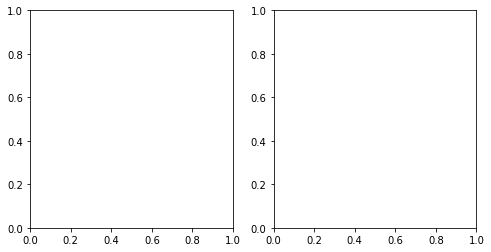

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.pyplot(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

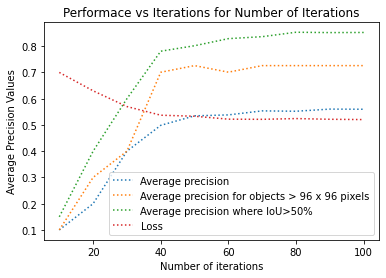

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ap=[0.10,0.20,0.4,0.49845952,0.53460336,0.53821796,0.5535659,0.55213714,0.5602849,0.55972946]
apl=[0.10,0.30,0.4,0.7007426,0.7259901,0.7009901,0.7259901,0.7259901,0.7259901,0.7259901]
Ap50 = [0.15,0.40,0.6,0.7809124,0.8017595,0.8287663,0.8362777,0.8531442,0.85182273,0.8522798]
loss=[0.70,0.63,0.57,0.53702635,0.53309476,0.52192885,0.52139235,0.5242295,0.5215584,0.52040815]
recall=[0.60,0.63,0.65,0.725,0.75,0.7,0.75,0.75,0.75,0.75]

xpoints = np.array([10,20,30,40,50,60,70,80,90,100])
ypoints = np.array([10,20,30,40,50,60,70,80,90,100])

plt.plot(xpoints,ap, linestyle = 'dotted',label='Average precision')
plt.plot(xpoints,apl, linestyle = 'dotted',label='Average precision for objects > 96 x 96 pixels')
plt.plot(xpoints,Ap50, linestyle = 'dotted',label='Average precision where IoU>50%')
plt.plot(xpoints,loss, linestyle = 'dotted',label='Loss')
plt.legend()
plt.title('Performace vs Iterations for Number of Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Average Precision Values')
plt.show()

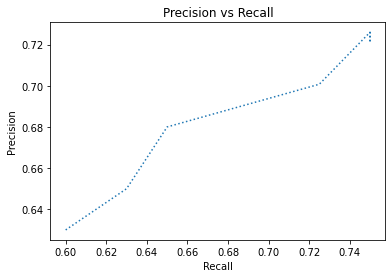

In [ ]:
apl=[0.63,0.65,0.68,0.7007426,0.7259901,0.7209901,0.7259901,0.7259901,0.7259901,0.7259901]
recall=[0.60,0.63,0.65,0.725,0.75,0.75,0.75,0.75,0.75,0.75]
plt.plot(recall,apl, linestyle = 'dotted',label='Average precision')

plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Run inference